## EDA

In [82]:
import sys
import os
import pandas as pd
import numpy as np
from psycopg2 import sql
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
# Add the 'src' directory to the PYTHONPATH
sys.path.append(os.path.abspath('../source'))

from connection_db.db_utils import get_connection

conn = get_connection()

Conexión exitosa


In [39]:
df = pd.read_sql_query("SELECT * FROM accidents", conn)
print(df.head())

C:\Users\Michel Burgos\AppData\Local\Temp\ipykernel_7348\4275037987.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("SELECT * FROM accidents", conn)


   id country  year     month day_of_week time_of_day urban_rural  road_type  \
0   1     USA  2002   October     Tuesday     Evening       Rural     Street   
1   2      UK  2014  December    Saturday     Evening       Urban     Street   
2   3     USA  2012      July      Sunday   Afternoon       Urban    Highway   
3   4      UK  2017       May    Saturday     Evening       Urban  Main Road   
4   5  Canada  2002      July     Tuesday   Afternoon       Rural    Highway   

  weather_conditions  visibility_level  ...  number_of_fatalities  \
0              Windy        220.414651  ...                     2   
1              Windy        168.311358  ...                     1   
2              Snowy        341.286506  ...                     4   
3              Clear        489.384536  ...                     3   
4              Rainy        348.344850  ...                     4   

   emergency_response_time traffic_volume road_condition      accident_cause  \
0                58.6257

### Datos faltantes

In [13]:
datos_faltantes = df.isnull().sum().sum()

if datos_faltantes == 0:
    print("\n Datos nulos no encontrados. ")
else:
    print(df[df.isnull().sum()])



 Datos nulos no encontrados. 


### Datos duplicados

In [14]:
#Total de duplicados
duplicados=df.duplicated()
total_duplicados= duplicados.sum()

print(f"\n Total de filas duplicadas: {total_duplicados}")

#Mostrar filas duplicadas 
if total_duplicados > 0:
    print("\n Filas duplicadas encontradas: ")
    print(df[df.duplicated()])




 Total de filas duplicadas: 0


In [15]:
#Valores de país
print(df["country"])

#Valores de región
print(df["region"])

0               USA
1                UK
2               USA
3                UK
4            Canada
            ...    
131995      Germany
131996       Brazil
131997       Russia
131998    Australia
131999          USA
Name: country, Length: 132000, dtype: object
0                Europe
1         North America
2         South America
3             Australia
4         South America
              ...      
131995             Asia
131996             Asia
131997             Asia
131998           Europe
131999             Asia
Name: region, Length: 132000, dtype: object


In [40]:
df = df.drop(columns=["region"])

In [16]:
print(df.dtypes)

id                               int64
country                         object
year                             int64
month                           object
day_of_week                     object
time_of_day                     object
urban_rural                     object
road_type                       object
weather_conditions              object
visibility_level               float64
number_of_vehicles_involved      int64
speed_limit                      int64
driver_age_group                object
driver_gender                   object
driver_alcohol_level           float64
driver_fatigue                   int64
vehicle_condition               object
pedestrians_involved             int64
cyclists_involved                int64
accident_severity               object
number_of_injuries               int64
number_of_fatalities             int64
emergency_response_time        float64
traffic_volume                 float64
road_condition                  object
accident_cause           

In [17]:

columnas_float = df.select_dtypes(include=['float'])

columnas_float_redondeadas = columnas_float.round(2)

print(columnas_float_redondeadas.head())

   visibility_level  driver_alcohol_level  emergency_response_time  \
0            220.41                  0.05                    58.63   
1            168.31                  0.23                    58.04   
2            341.29                  0.14                    42.37   
3            489.38                  0.12                    48.55   
4            348.34                  0.16                    18.32   

   traffic_volume  medical_cost  economic_loss  population_density  
0         7412.75      40499.86       22072.88             3866.27  
1         4458.63       6486.60        9534.40             2333.92  
2         9856.92      29164.41       58009.15             4408.89  
3         4958.65      25797.21       20907.15             2810.82  
4         3843.19      15605.29       13584.06             3883.65  


In [18]:
df.describe()

,id,year,visibility_level,number_of_vehicles_involved,speed_limit,driver_alcohol_level,driver_fatigue,pedestrians_involved,cyclists_involved,number_of_injuries,number_of_fatalities,emergency_response_time,traffic_volume,insurance_claims,medical_cost,economic_loss,population_density
count,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000,132000.000000
mean,66000.500000,2011.973348,275.038776,2.501227,74.544068,0.125232,0.500576,1.000773,0.998356,9.508205,1.995439,32.491746,5041.929098,4.495621,25198.454901,50437.505615,2506.476223
std,38105.262104,7.198624,129.923625,1.117272,26.001448,0.072225,0.500002,0.816304,0.817764,5.774366,1.412974,15.889537,2860.671611,2.867347,14274.771691,28584.290822,1440.646352
min,1.000000,2000.000000,50.001928,1.000000,30.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,5.000177,100.062626,0.000000,500.110090,1000.335085,10.002669
25%,33000.750000,2006.000000,162.338860,2.000000,52.000000,0.062630,0.000000,0.000000,0.000000,5.000000,1.000000,18.732879,2560.601299,2.000000,12836.933596,25692.817343,1258.158299
50%,66000.500000,2012.000000,274.672990,3.000000,74.000000,0.125468,1.000000,1.000000,1.000000,9.000000,2.000000,32.534944,5037.909855,4.000000,25188.202669,50395.499874,2506.203333
75%,99000.250000,2018.000000,388.014111,3.000000,97.000000,0.187876,1.000000,2.000000,2.000000,15.000000,3.000000,46.289527,7524.638162,7.000000,37529.024899,75186.626093,3756.652950
max,132000.000000,2024.000000,499.999646,4.000000,119.000000,0.249999,1.000000,2.000000,2.000000,19.000000,4.000000,59.999588,9999.997468,9.000000,49999.930130,99999.622968,4999.991745


¿en qué moneda están las perdidas y el costo médico?

In [29]:
print(df.columns)

In [21]:
def categorize_alcohol_level(driver_alcohol_level):
    if driver_alcohol_level < 0.03:
        return "Bajo"
    elif driver_alcohol_level < 0.08:
        return "Moderado"
    elif driver_alcohol_level < 0.20:
        return "Alto"
    elif driver_alcohol_level < 0.30:
        return "Peligroso"
    else:
        return "Letal"

df["Alcohol_Level_Category"] = df["driver_alcohol_level"].apply(categorize_alcohol_level)

print(df["Alcohol_Level_Category"])


0          Moderado
1         Peligroso
2              Alto
3              Alto
4              Alto
            ...    
131995     Moderado
131996     Moderado
131997     Moderado
131998         Bajo
131999         Alto
Name: Alcohol_Level_Category, Length: 132000, dtype: object


In [36]:
def categorize_visibility(visibility_level):
    if visibility_level < 200:
        return "Muy Baja"
    elif visibility_level < 300:
        return "Baja"
    elif visibility_level < 400:
        return "Moderada"
    else:
        return "Alta"

df["Visibility_Category"] = df["visibility_level"].apply(categorize_visibility)

print(df["Visibility_Category"])


0             Baja
1         Muy Baja
2         Moderada
3             Alta
4         Moderada
            ...   
131995    Moderada
131996    Muy Baja
131997    Muy Baja
131998        Baja
131999        Baja
Name: Visibility_Category, Length: 132000, dtype: object


El análisis exploratorio de datos debería dar respuestas (al menos) a lo siguiente:

¿Qué pregunta(s) estás tratando de resolver (o probar que estás equivocado)?

¿Qué tipo de datos tiene y cómo trata los diferentes tipos?

¿Qué falta en los datos y cómo los maneja?

¿Qué hacer con los datos faltantes, outliers o información mal inputada?

¿Se puede sacar más provecho a los datos ?



In [45]:
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

months_order = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]

day_cat_type = pd.CategoricalDtype(categories=days_order, ordered=True)
month_cat_type = pd.CategoricalDtype(categories=months_order, ordered=True)

df["day_of_week"] = df["day_of_week"].astype(day_cat_type)
df["month"] = df["month"].astype(month_cat_type)

In [51]:
day_ordered = df["day_of_week"].cat.ordered
month_ordered = df["month"].cat.ordered

# Print if ordered
if day_ordered:
    print("Day of Week (Categorical, max 5):")
    print(df["day_of_week"].head(5))

if month_ordered:
    print("\nMonth (Categorical, max 5):")
    print(df["month"].head(5))

Day of Week (Categorical, max 5):
0     Tuesday
1    Saturday
2      Sunday
3    Saturday
4     Tuesday
Name: day_of_week, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

Month (Categorical, max 5):
0     October
1    December
2        July
3         May
4        July
Name: month, dtype: category
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']


C:\Users\Michel Burgos\AppData\Local\Temp\ipykernel_7348\3047161921.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


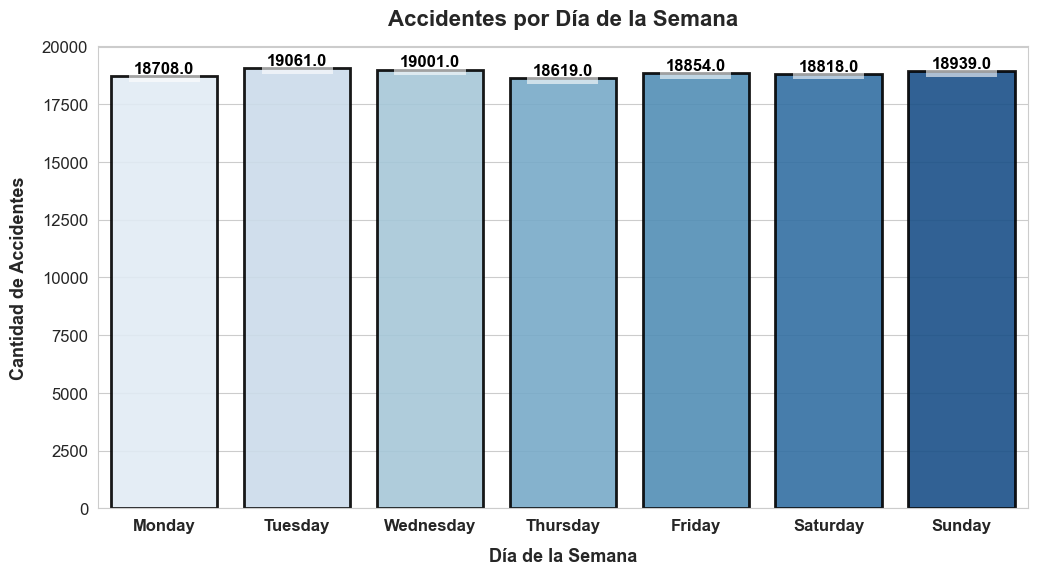

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer estilo
sns.set_style("whitegrid")

# Definir el orden correcto de los días
dias_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Crear la figura y el gráfico
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=df, 
    x='day_of_week', 
    order=dias_ordenados,  # Orden correcto
    palette='Blues', 
    edgecolor='black', 
    linewidth=2, 
    alpha=0.9
)

# Personalización de etiquetas y títulos
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
plt.title('Accidentes por Día de la Semana', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Día de la Semana', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Cantidad de Accidentes', fontsize=13, fontweight='bold', labelpad=10)

# Agregar etiquetas con fondo semitransparente para mayor claridad
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}', 
        (p.get_x() + p.get_width() / 2., p.get_height() + 1), 
        ha='center', va='bottom', 
        fontsize=12, fontweight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.6)  # Sombra blanca
    )

# Mostrar gráfico
plt.show()


C:\Users\Michel Burgos\AppData\Local\Temp\ipykernel_7348\1034896907.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


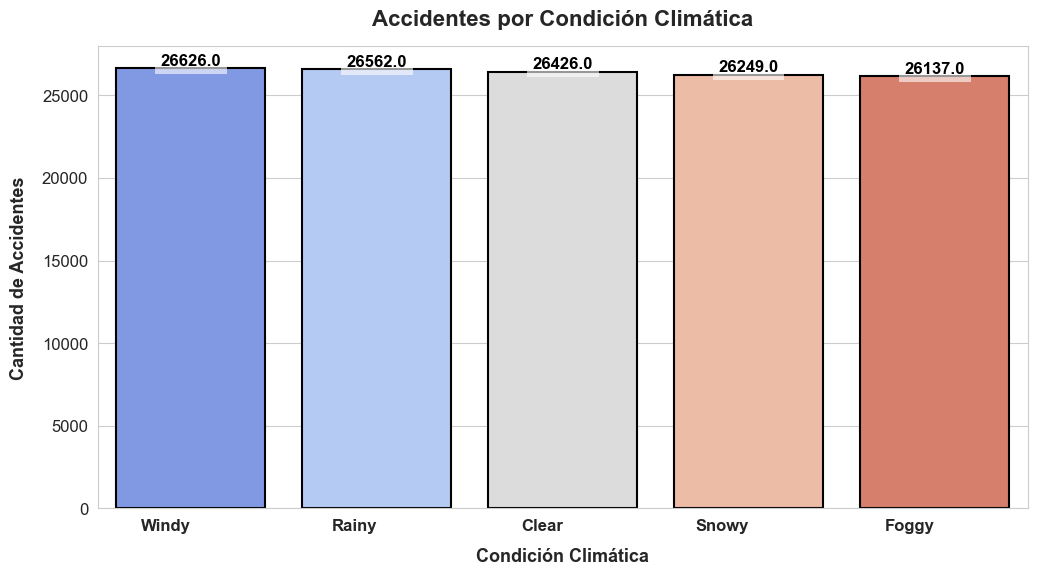

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo general
sns.set_style("whitegrid")

# Crear la figura
plt.figure(figsize=(12, 6))

# Gráfico de barras con colores vibrantes y bordes definidos
ax = sns.countplot(
    data=df, 
    x='weather_conditions', 
    order=df['weather_conditions'].value_counts().index, 
    palette='coolwarm', 
    edgecolor='black', 
    linewidth=1.5
)

# Personalización de etiquetas y títulos
plt.xticks(rotation=0, ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)
plt.title('Accidentes por Condición Climática', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Condición Climática', fontsize=13, fontweight='bold', labelpad=10)
plt.ylabel('Cantidad de Accidentes', fontsize=13, fontweight='bold', labelpad=10)

# Agregar etiquetas con fondo semitransparente para mejor visibilidad
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()}', 
        (p.get_x() + p.get_width() / 2., p.get_height() + 1), 
        ha='center', va='bottom', 
        fontsize=12, fontweight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.6)  # Sombra blanca
    )

# Mostrar gráfico
plt.show()


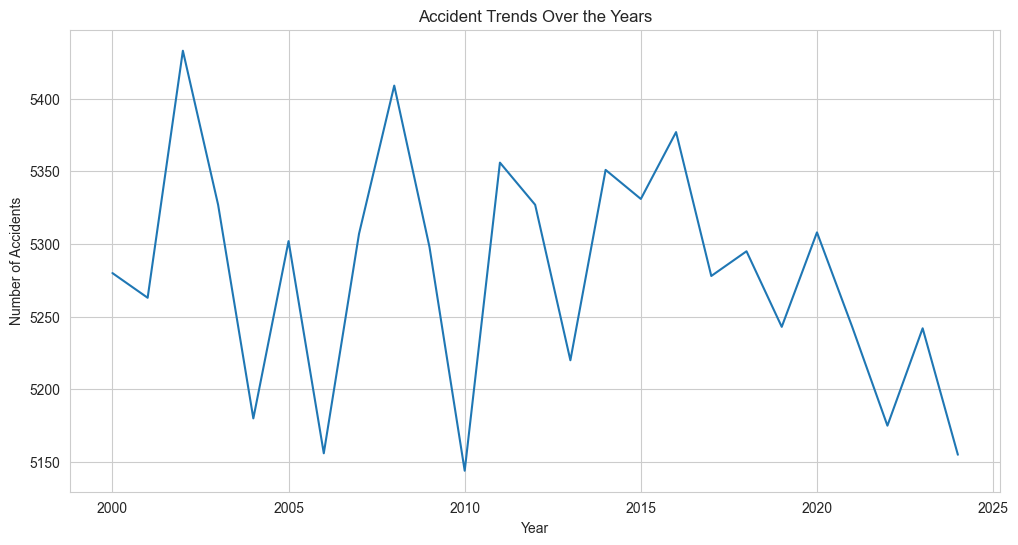

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="year", y="accident_count", data=df.groupby("year").size().reset_index(name="accident_count"))
plt.title("Accident Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()

In [ ]:
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
weekends = ["Saturday", "Sunday"]

df["day_type"] = df["day_of_week"].apply(lambda x: "Weekday" if x in weekdays else "Weekend")

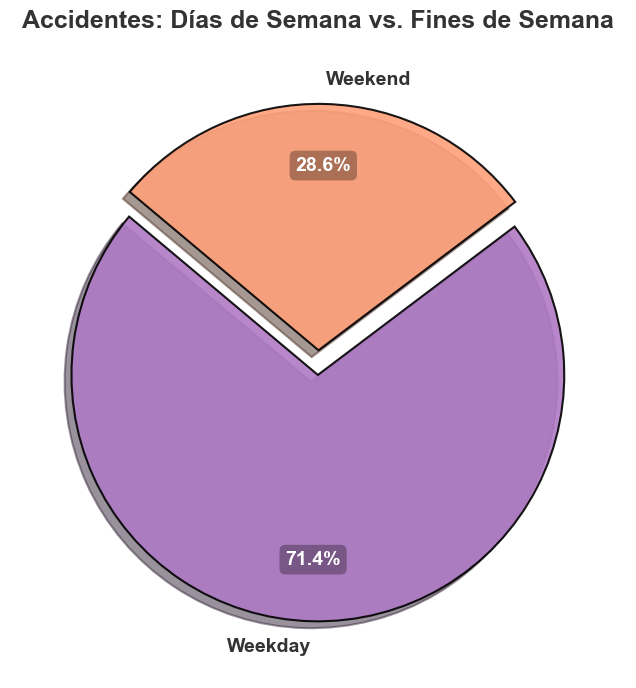

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer estilo
sns.set_style("white")

# Contar la cantidad de accidentes en días de semana vs. fines de semana
accidents_count = df["day_type"].value_counts()

# NUEVA paleta de colores vibrantes
colors = ["#af7ac5", "#FFA07A"]  # Amarillo cálido para weekdays, azul profundo para weekends
explode = (0.02, 0.08)  # Pequeña separación para destacar los fines de semana

# Crear la figura
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    accidents_count, 
    labels=accidents_count.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    explode=explode, 
    shadow=True, 
    pctdistance=0.75,  # Acerca los porcentajes al centro
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'alpha': 0.9}  # Bordes sutiles y estilizados
)

# Mejorar etiquetas
for text in texts:
    text.set_fontsize(14)
    text.set_fontweight("bold")
    text.set_color("#333")  # Color oscuro para contraste

# Mejorar porcentajes con fondo oscuro translúcido
for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight("bold")
    autotext.set_color("white")
    autotext.set_bbox(dict(facecolor='black', alpha=0.3, edgecolor='none', boxstyle="round,pad=0.3"))


# Título estilizado
plt.title("Accidentes: Días de Semana vs. Fines de Semana", fontsize=18, fontweight="bold", pad=25, color="#333")

# Mostrar gráfico
plt.show()


In [84]:
numerical_cols = ['speed_limit', 'driver_alcohol_level', 'number_of_vehicles_involved',
                  'number_of_injuries', 'number_of_fatalities', 'emergency_response_time',
                  'traffic_volume', 'medical_cost', 'economic_loss', 'population_density']

for col in numerical_cols:
    print(f"\n--- Handling Outliers for {col} ---")

    # 1. Identify Outliers (IQR Method)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f"Number of Outliers: {len(outliers)}")

    # 2. Handle Outliers (Capping/Flooring)
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

    print(f"Outliers handled using capping/flooring.")

    # 3. Verify Outliers (Optional)
    Q1_new = df[col].quantile(0.25)
    Q3_new = df[col].quantile(0.75)
    IQR_new = Q3_new - Q1_new
    lower_limit_new = Q1_new - 1.5 * IQR_new
    upper_limit_new = Q3_new + 1.5 * IQR_new

    outliers_after = df[(df[col] < lower_limit_new) | (df[col] > upper_limit_new)]
    print(f"Number of Outliers after handling: {len(outliers_after)}")


--- Handling Outliers for speed_limit ---
Number of Outliers: 0
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for driver_alcohol_level ---
Number of Outliers: 0
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for number_of_vehicles_involved ---
Number of Outliers: 0
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for number_of_injuries ---
Number of Outliers: 0
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for number_of_fatalities ---
Number of Outliers: 0
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for emergency_response_time ---
Number of Outliers: 0
Outliers handled using capping/flooring.
Number of Outliers after handling: 0

--- Handling Outliers for traffic_volume ---
Number of Outliers: 0
Outliers handled usin

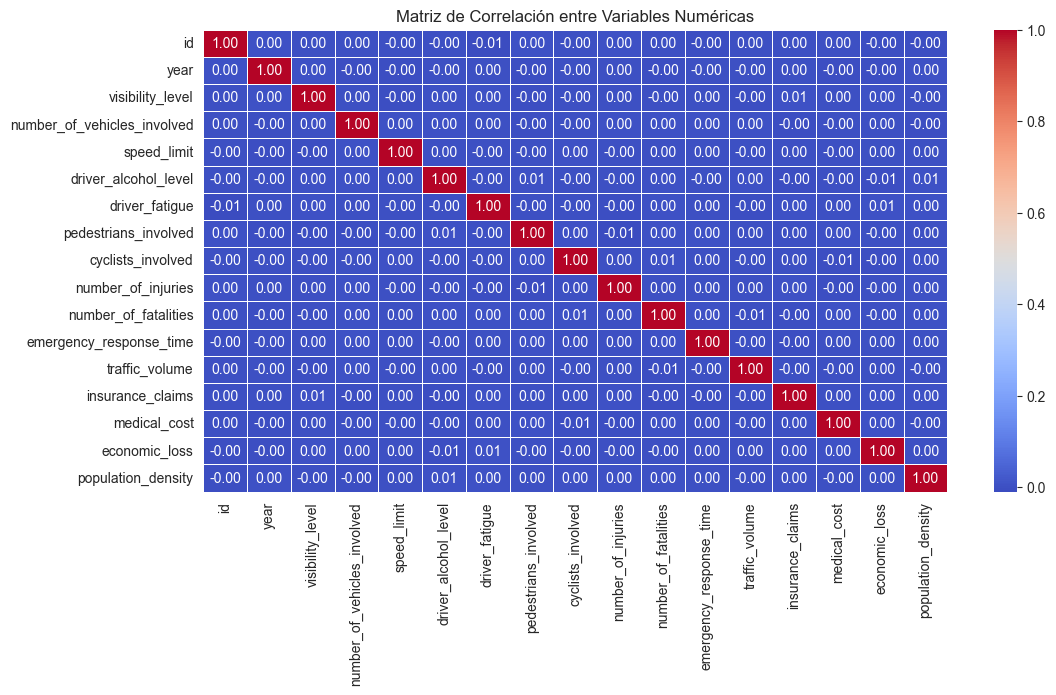

In [89]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Matriz de correlación
corr_matrix = numeric_df.corr()

# Configuración del gráfico
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Título
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()